In [4]:
import torch as t
from einops import rearrange, repeat
import matplotlib.pyplot as plt
import numpy as np


In [2]:
##Prove that the transpose of the transpose of a matrix is the matrix itself:
A = t.rand(size=(5,6))
print(A)
t.transpose(t.transpose(A,1,0),1,0) == A
A.T == t.transpose(A,1,0)

tensor([[0.0694, 0.1046, 0.9675, 0.9383, 0.2678, 0.3330],
        [0.0481, 0.9870, 0.7222, 0.9096, 0.2698, 0.2272],
        [0.3646, 0.0664, 0.2286, 0.1369, 0.7501, 0.7492],
        [0.7422, 0.7710, 0.7692, 0.6601, 0.6560, 0.4311],
        [0.8775, 0.4255, 0.4698, 0.3619, 0.3531, 0.5169]])


tensor([[True, True, True, True, True],
        [True, True, True, True, True],
        [True, True, True, True, True],
        [True, True, True, True, True],
        [True, True, True, True, True],
        [True, True, True, True, True]])

In [3]:
assert A.mean() == A.sum()/A.numel()
A.mean(dim = 0)== A.sum(dim=0)/A.shape[0]

tensor([True, True, True, True, True, True])

In [4]:
#Broadcast a sum to keep the shape
A_sum = A.sum(dim = 1, keepdims= True)
(A/A_sum).sum(dim=1)

tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000])

In [5]:
## dot product 

a = t.rand((5,))
b = t.rand((5,))
t.dot(a,b), t.sum(a*b), t.dot(b,a)

(tensor(0.7581), tensor(0.7581), tensor(0.7581))

In [6]:
## matrix
dims = A.shape
B = t.rand((dims[1],dims[0]))
assert B.T.shape == A.shape

A@B - t.einsum("ij,jk-> ik",A,B)

tensor([[ 0.0000e+00,  5.9605e-08,  0.0000e+00,  0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  1.1921e-07,  1.1921e-07],
        [ 0.0000e+00,  1.1921e-07,  0.0000e+00,  0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00, -1.1921e-07, -1.1921e-07, -1.1921e-07],
        [ 0.0000e+00,  0.0000e+00,  1.1921e-07,  0.0000e+00,  1.1921e-07]])

In [7]:
## norms 
## l2 norm - Euclidean distance 
assert t.norm(a) == (a**2).sum().sqrt()
print(t.norm(A) - (A**2).sum().sqrt())
## l1 norm - actual (summed) distance
t.abs(a).sum()

AssertionError: 

In [8]:
## The sum and transpose commute: 
A2 = t.rand(dims)
A.T + A2.T == (A+A2).T

tensor([[True, True, True, True, True],
        [True, True, True, True, True],
        [True, True, True, True, True],
        [True, True, True, True, True],
        [True, True, True, True, True],
        [True, True, True, True, True]])

In [9]:
X = t.arange(24).reshape(2, 3, 4)
nX = X.shape
assert len(X) == X.shape[0]
    
print(X.sum(dim=0).shape == (nX[1], nX[2]))
print(X.sum(dim=1).shape == (nX[0], nX[2]))
print(X.sum(dim=2).shape == (nX[0], nX[1]))


True
True
True


In [10]:
import numpy as np
np.linalg.norm(X), (X**2).sum().sqrt()

(65.75712889109438, tensor(65.7571))

In [11]:
AA = t.rand((100,200))
BB = t.rand((100,200))
CC = t.rand((100,200))
stacked = t.stack([AA,BB,CC])
assert stacked.shape == (3,100,200)

stacked[1] ==BB

tensor([[True, True, True,  ..., True, True, True],
        [True, True, True,  ..., True, True, True],
        [True, True, True,  ..., True, True, True],
        ...,
        [True, True, True,  ..., True, True, True],
        [True, True, True,  ..., True, True, True],
        [True, True, True,  ..., True, True, True]])

PCA : re-express a high-dim dataset (features) in terms of a lower dimensional dataset with minimal information loss

[ 0.03351168 -0.00408072] 200
1.3600232051658167e-17


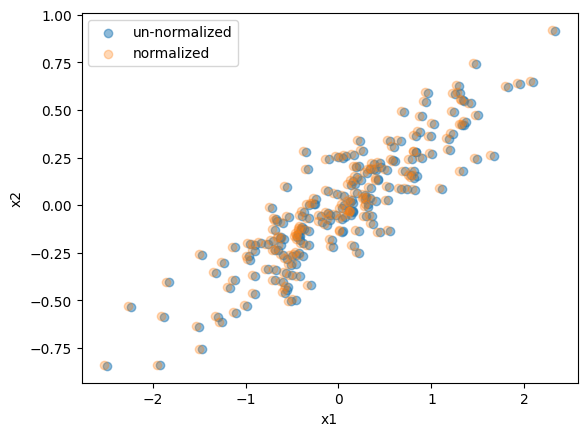

In [5]:

#As an example, consider 2d data 
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
# subtract the mean (across all examples) to normalize it 
print(X.mean(axis=0),len(X))
X_0 = X - X.mean(axis=0)
print(X_0.mean())
#assert X_0.mean(axis=0) == 0
## should be centered around 0 
plt.scatter(X[:,0],X[:,1], alpha = .5)
plt.scatter(X_0[:,0],X_0[:,1],alpha = .3)
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(["un-normalized","normalized"])

[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]] tensor([[-0.9445,  0.3286],
        [-0.3286, -0.9445]], dtype=torch.float64)
[2.47419458 0.86089761]
[-0.1340136   0.38515116]


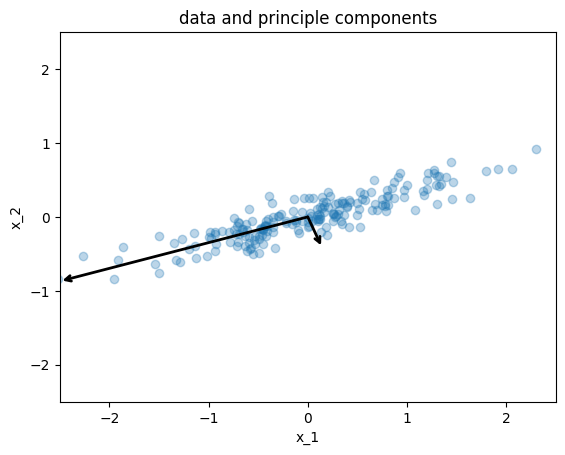

In [44]:
## Compute the covariance between the random variables X1 and X2
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

n = len(X_0)
# positive covariance for all cases: direct relationship between the random variables
## This gives a measure for the linear dependence 

#cov_x = t.tensor(np.corrcoef(X_0.T),dtype=t.float32)
#cov_x  =  t.tensor((X.T@X)/(n-1))
## Using pytorch 
U,S,V = t.pca_lowrank(t.tensor(X_0), q=2, center=True, niter=2)

## Using sklearn
pca = PCA(n_components=2, whiten=True)
pca.fit(X_0)
vecs_sk = pca.components_.T

# comparing eigenvectors - columns of following matrices
## sign flip on second vector
print(vecs_sk, V)
# explained variance is the amount of variance attributed to each eigenvalue (principle component)
expl_var = S**2/(n-1)
scale = 3
#print(pca.explained_variance_, expl_var)
# print(pca.mean_, X_0.mean(axis=0))
#We want to plot these vectors from the mean of the dataset (since we normalized this, mean = 0)

def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)


fig, ax = plt.subplots(1,1)
ax.scatter(X_0[:,0],X_0[:,1], alpha = .3)
ax.set_xlim(-2.5, 2.5)
ax.set_ylim(-2.5, 2.5)
ax.set(xlabel="x_1", ylabel="x_2", title= "data and principle components")
for length, vec in zip(expl_var, V.T):
    scaled_vec = (scale * t.sqrt(length) * vec).numpy()
    print(-scaled_vec)
    draw_vector([0,0],scaled_vec, ax=ax)


# for length, vector in zip(pca.explained_variance_, pca.components_):
#     v = vector * 3 * np.sqrt(length)
#     draw_vector(pca.mean_, pca.mean_ + v, ax=ax)

# plt.plot((V.T[0]))
# plt.plot((V.T[1]))

# plt.scatter(X_0[:,0],X_0[:,1], alpha = .3)
# plt.xlabel('x1')
# plt.ylabel('x2')

#V[:,0]




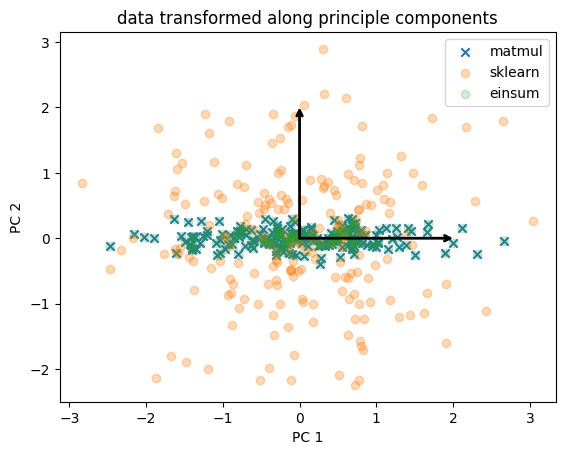

In [60]:
## Find eigenvectors - the ones whose directions remain unchanged after any linear transformation 
### number of eigenvectors == number of dimensions 
## project data onto principal directions

proj_X = t.einsum("ij,jk -> ik",V.T,t.tensor(X_0).T).T

## I'm not sure why pca.transform scales the data in the x_2 direction. To me, it makes sense to see it squeezed, since the first principle component is much more important (has much greater variance associated with it) than the other

_, ax = plt.subplots()
ax.scatter(t.matmul(t.tensor(X_0), V[:, :2])[:,0],t.matmul(t.tensor(X_0), V[:, :2])[:,1], marker = "x")
ax.scatter(pca.transform(X_0)[:,0], pca.transform(X_0)[:,1], alpha=.3)
ax.scatter(proj_X[:,0],proj_X[:,1], alpha=.2)

ax.legend(["matmul", "sklearn", "einsum"])
ax.set(xlabel="PC 1", ylabel="PC 2", title= "data transformed along principle components")

draw_vector([0,0],[0,2], ax=ax)
draw_vector([0,0],[2,0], ax=ax)

